<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/EB_RNA_and_NOR_NFR_f6ef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The notebook run Differential expression analysis between Undifferentiated EBs and EBs post OSK induction and lists genes with regions going from NFR to NOR and are significantly down post Etv2 induction

In [ ]:
start_time0 <- Sys.time()
options(max.print=1000)

### Install external packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [ ]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

## Install R packages

In [ ]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
required_packages <- c(
  'devtools',
  'DESeq2',
  'TxDb.Mmusculus.UCSC.mm10.knownGene',
  'org.Mm.eg.db',
  'clusterProfiler'
)

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘bitops’, ‘formatR’, ‘plogr’, ‘png’, ‘Biostrings’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘matrixStats’, ‘lambda.r’, ‘futile.options’, ‘RSQLite’, ‘KEGGREST’, ‘XML’, ‘xtable’, ‘GenomeInfoDb’, ‘XVector’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘AnnotationDbi’, ‘annotate’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘genefilter’, ‘locfit’, ‘geneplotter’, ‘Rcpp’, ‘RcppArmadillo’


Old packages: 'blob', 'RColorBrewer'



# Download packages from Github

In [ ]:
devtools::install_github("GuangchuangYu/ChIPseeker")

enrichplot   (1.14.2 -> d11b60bb6...) [GitHub]
blob         (1.2.2  -> 1.2.3       ) [CRAN]
RColorBrewer (1.1-2  -> 1.1-3       ) [CRAN]
caTools      (NA     -> 1.18.2      ) [CRAN]
gtools       (NA     -> 3.9.2       ) [CRAN]
TxDb.Hsap... (NA     -> 3.2.2       ) [CRAN]
plotrix      (NA     -> 3.8-2       ) [CRAN]
gplots       (NA     -> 3.1.1       ) [CRAN]


Installing 7 packages: blob, RColorBrewer, caTools, gtools, TxDb.Hsapiens.UCSC.hg19.knownGene, plotrix, gplots

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





* checking for file ‘/tmp/RtmphZ7pk9/remotes56176c39f1/GuangchuangYu-enrichplot-d11b60b/DESCRIPTION’ ... OK
* preparing ‘enrichplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘enrichplot_1.13.1.992.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmphZ7pk9/remotes5625ab82c4/YuLab-SMU-ChIPseeker-5371322/DESCRIPTION’ ... OK
* preparing ‘ChIPseeker’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘ChIPseeker_1.31.3.900.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Load R packages

In [ ]:
library(tidyr)
library(dplyr)
library(ggplot2) # colorRamp2
library(parallel)
library(DESeq2)
library(ChIPseeker)
library(clusterProfiler)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package

# Read regions from SeATAC for the Etv2 motifs

In [ ]:
remote_res <- c(down = 'https://s3.msi.umn.edu/dsouz072/projects/seatac_project/config/seatac_EB_Etv2/Flk1pos_down_EB_regions.rds',
  up = 'https://s3.msi.umn.edu/dsouz072/projects/seatac_project/config/seatac_EB_Etv2/Flk1pos_Up_EB_regions.rds')
for (f in remote_res){
  system(sprintf('wget -cx %s', f))
}
eb <- gsub('https://', './', remote_res)

In [ ]:
eb_down <- readRDS(eb[['down']])
eb_up <- readRDS(eb[['up']])

In [ ]:
sprintf('number of motif-centric regions: %s', length(eb)) %>% message()

number of motif-centric regions: 2



In [ ]:
eb <- eb_down

In [ ]:
eb$flk1pos <- eb_up$flk1pos

In [ ]:
is_signif <- eb$padj < 0.05
sprintf('# of significantly differential V-plots called by SeATAC: %d', sum(is_signif)) %>% message()

# of significantly differential V-plots called by SeATAC: 6275



## Read bulk RNA-seq of EB differentiation

In [ ]:
se_bulk <- readRDS(gzcon(url('https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2RNA-seq_version=20190909a/se.rds')))

In [ ]:
se_bulk

class: SummarizedExperiment 
dim: 23429 10 
metadata(0):
assays(1): counts
rownames(23429): 0610005C13Rik 0610007C21Rik ... a l7Rn6
rowData names(1): refseq_mrna
colnames: NULL
colData names(10): study_accession run ... count.file
  align.summary.file

## Find  DE genes between no dox and Flk1+ cells post induction

In [ ]:
se_bulk <- DESeqDataSet(se_bulk, design = ~ group)
se_bulk <- estimateSizeFactors(se_bulk)
se_bulk <- DESeq(se_bulk)
assays(se_bulk)$normalized_counts <- log2(counts(se_bulk, normalized = TRUE) + 1)
res <- results(se_bulk, contrast = c('group', 'EB_Dox_D25_Flk1pos_Etv2', 'EB_NoDox_D25_Etv2'))

Warning message in DESeqDataSet(se_bulk, design = ~group):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [ ]:
summary(res)


out of 18526 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 4394, 24%
LFC < 0 (down)     : 4295, 23%
outliers [1]       : 0, 0%
low counts [2]     : 1771, 9.6%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
res$SYMBOL <- rownames(res)

# NFR -> NOR 
(Undifferentiated EB and EB post OSK induction)

In [ ]:
down <- eb[eb$log_ratio > 0.1 & eb$padj < 0.05]

In [ ]:
anno <- annotatePeak(down, tssRegion = c(-5000, 1000),TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene,
        annoDb = 'org.Mm.eg.db')

>> preparing features information...		 2022-04-11 07:04:41 PM 
>> identifying nearest features...		 2022-04-11 07:04:43 PM 
>> calculating distance from peak to TSS...	 2022-04-11 07:04:44 PM 
>> assigning genomic annotation...		 2022-04-11 07:04:44 PM 
>> adding gene annotation...			 2022-04-11 07:05:05 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-11 07:05:05 PM 
>> done...					 2022-04-11 07:05:05 PM 


In [ ]:
dat <- data.frame(anno)

In [ ]:
dat$log2FC <- res$log2FoldChange[match(dat$SYMBOL, rownames(res))]

In [ ]:
dat$padj_RNA <- res$padj[match(dat$SYMBOL, rownames(res))]

In [ ]:
library(ggplot2)

In [ ]:
dat$group <- 'NFR_NOR'

#NOR -> NFR
(EBs and EBs post OSK induction)

In [ ]:
up <- eb[eb$log_ratio < -0.1 & eb$padj < 0.05]

In [ ]:
anno_up <- annotatePeak(up, tssRegion = c(-5000, 1000),TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene,
        annoDb = 'org.Mm.eg.db')

>> preparing features information...		 2022-04-11 07:06:39 PM 
>> identifying nearest features...		 2022-04-11 07:06:39 PM 
>> calculating distance from peak to TSS...	 2022-04-11 07:06:40 PM 
>> assigning genomic annotation...		 2022-04-11 07:06:40 PM 
>> adding gene annotation...			 2022-04-11 07:06:42 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-11 07:06:42 PM 
>> done...					 2022-04-11 07:06:42 PM 


In [ ]:
dat_up <- data.frame(anno_up)

In [ ]:
dat_up$log2FC <- res$log2FoldChange[match(dat_up$SYMBOL, rownames(res))]

In [ ]:
dat_up$padj_RNA <- res$padj[match(dat_up$SYMBOL, rownames(res))]

In [ ]:
dat_up$group <- 'NOR_NFR'

#Combined bar plots for Down, Up and NoChange genes

In [ ]:
df <- rbind(dat, dat_up)

In [ ]:
df_promoter <- df[grepl('Promoter',df$annotation),]

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'group', 'Direction'. You can override
using the `.groups` argument.


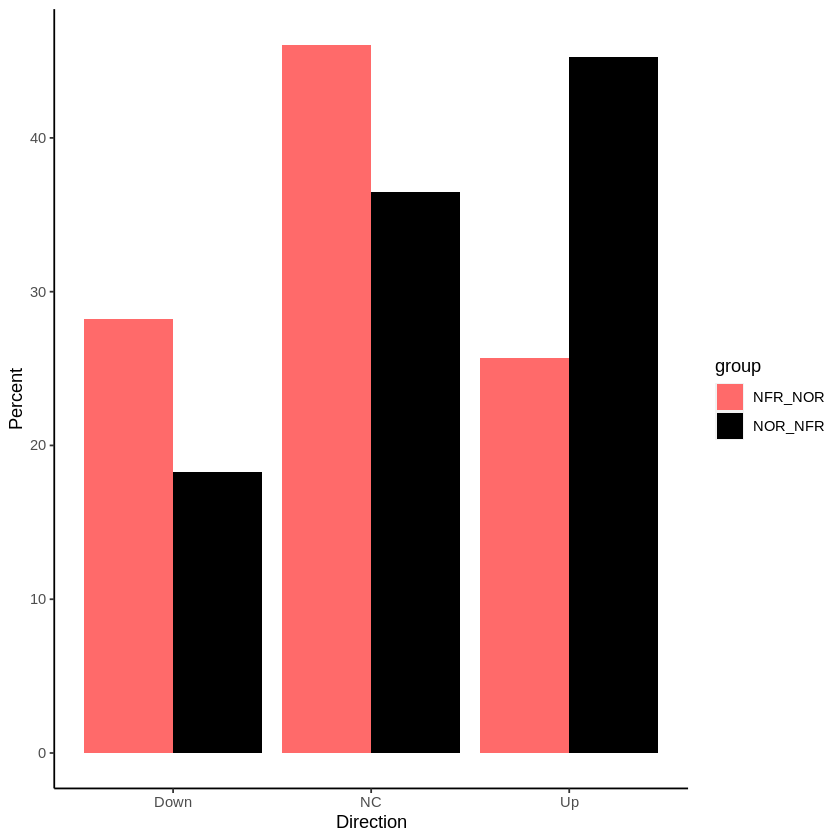

In [ ]:
df_promoter %>%
  filter(!is.na(padj_RNA)) %>%
  mutate(  Direction = case_when(
    padj_RNA < 0.05 & log2FC < 0 ~ 'Down',
    padj_RNA < 0.05 & log2FC > 0 ~ 'Up',
    padj_RNA > 0.05 ~ 'NC'
    )
  ) %>% 
  group_by(group) %>%
  summarize(Total = n(),
  across()
  ) %>%
  group_by(group, Direction, Total) %>%
  summarise(Count = n()) %>%
  mutate(Percent = 100*Count/Total) %>%
  ggplot(aes(x = Direction, y = Percent, fill = group)) +
  geom_bar(stat = 'identity', position = 'dodge') +
  scale_fill_manual(values = c('indianred1','black')) + 
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  panel.background = element_blank(), axis.line = element_line(colour = "black"))



#Box plots with replicates to show the normalized counts calculated by DESeq2

In [ ]:
mat <- counts(se_bulk,normalized=TRUE)

In [ ]:
colnames(mat) <- se_bulk$group

In [ ]:
genes_selected <- data.frame(t(mat[rownames(mat) %in% c('T','Mycn'),]))

In [ ]:
genes_selected$group <- se_bulk$group

In [ ]:
genes_selected <- genes_selected[!grepl('D2_|_Dox_D25_Etv2', genes_selected$group),]

In [ ]:
df_genes <- gather(genes_selected, "genes", "normalized_counts", -group)

In [ ]:
df_genes$group <- factor(df_genes$group, levels = c('EB_NoDox_D25_Etv2','EB_Dox_D25_Flk1pos_Etv2'))

## Barplot for normalized read counts showing a decrease at D7 MEFs post OSK induction

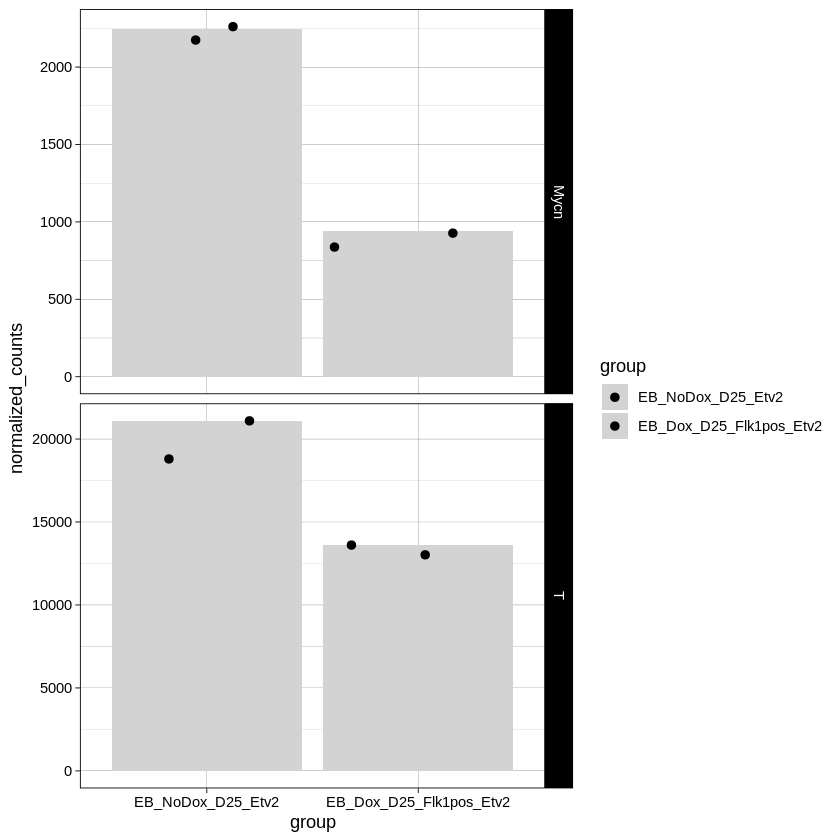

In [ ]:
df_genes %>%
  ggplot(aes(group, normalized_counts, fill = group)) +
  geom_bar(stat = 'identity', position = 'dodge') +
  geom_jitter(size = 2) + 
  scale_fill_manual(values = c('lightgrey','lightgrey')) +
  facet_grid(genes ~ ., scales = 'free') + 
  theme_linedraw()


In [ ]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] stringr_1.4.0                            
 [2] org.Mm.eg.db_3.14.0                      
 [3] TxDb.Mmusculus.UCSC.mm10.knownGene_3.10.0
 [4] GenomicFeatures_1.46.5                   
 [5] AnnotationDbi_1.56.2                     
 [6] cluste

In [ ]:
Sys.time() - start_time0

Time difference of 31.2113 mins